<a href="https://colab.research.google.com/github/Bhavin52/APPL_stock_price_prediction/blob/main/book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pickle import dump

In [50]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
data = pd.read_csv('/content/AAPL.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,03-01-2012,58.485714,58.928570,58.428570,58.747143,75555200
1,04-01-2012,58.571430,59.240002,58.468571,59.062859,65005500
2,05-01-2012,59.278572,59.792858,58.952858,59.718571,67817400
3,06-01-2012,59.967144,60.392857,59.888573,60.342857,79573200
4,09-01-2012,60.785713,61.107143,60.192856,60.247143,98506100


In [52]:
data.shape

(2011, 6)

In [53]:
data.info

<bound method DataFrame.info of             Date        Open        High         Low       Close    Volume
0     03-01-2012   58.485714   58.928570   58.428570   58.747143  75555200
1     04-01-2012   58.571430   59.240002   58.468571   59.062859  65005500
2     05-01-2012   59.278572   59.792858   58.952858   59.718571  67817400
3     06-01-2012   59.967144   60.392857   59.888573   60.342857  79573200
4     09-01-2012   60.785713   61.107143   60.192856   60.247143  98506100
...          ...         ...         ...         ...         ...       ...
2006  23-12-2019  280.529999  284.250000  280.369995  284.000000  24643000
2007  24-12-2019  284.690002  284.890015  282.920013  284.269989  12119700
2008  26-12-2019  284.820007  289.980011  284.700012  289.910004  23280300
2009  27-12-2019  291.119995  293.970001  288.119995  289.799988  36566500
2010  30-12-2019  289.459991  292.690002  285.220001  291.519989  36028600

[2011 rows x 6 columns]>

In [54]:
data.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [55]:
data.duplicated().any()


False

In [56]:
data.describe()

,Open,High,Low,Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,3.765300e+08


In [57]:
data['Date']

0       03-01-2012
1       04-01-2012
2       05-01-2012
3       06-01-2012
4       09-01-2012
           ...    
2006    23-12-2019
2007    24-12-2019
2008    26-12-2019
2009    27-12-2019
2010    30-12-2019
Name: Date, Length: 2011, dtype: object

In [58]:
data['Date'] = pd.to_datetime(data['Date'],format='%d-%m-%Y')
data.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

In [59]:
data.set_index('Date',inplace=True)
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,98506100


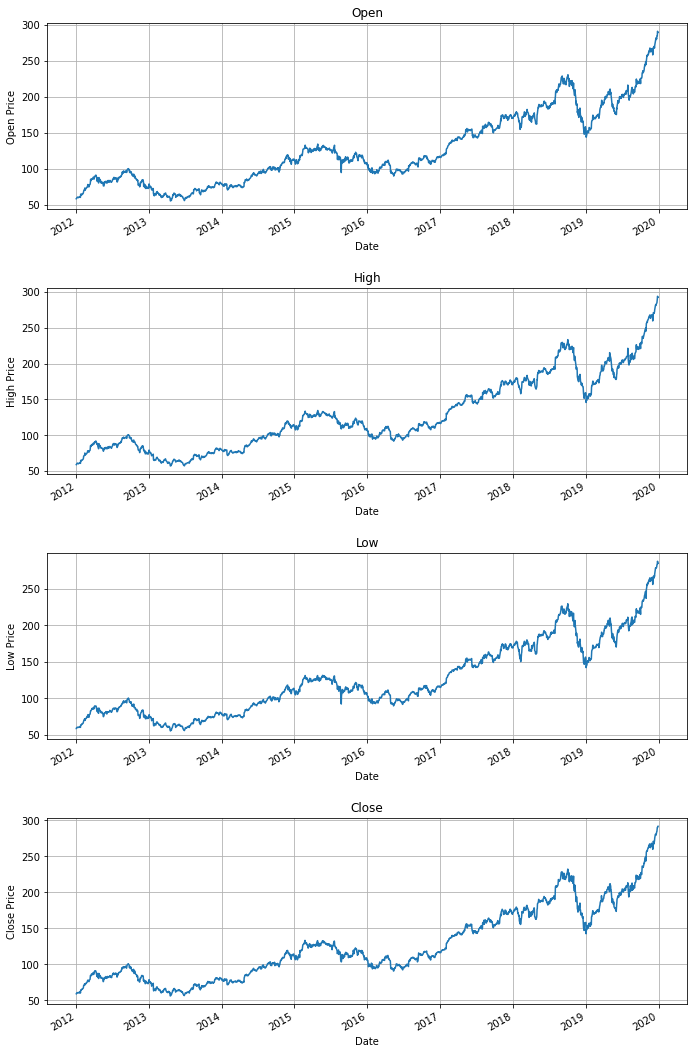

In [60]:
fig, (axs1,axs2,axs3,axs4) = plt.subplots(4,figsize=(10,15))

data['Open'].plot(ax=axs1)
axs1.set_xlabel('Date')
axs1.set_ylabel('Open Price')
axs1.grid(True)
axs1.set_title('Open')

data['High'].plot(ax=axs2)
axs2.set_xlabel('Date')
axs2.set_ylabel('High Price')
axs2.grid(True)
axs2.set_title('High')

data['Low'].plot(ax=axs3)
axs3.set_xlabel('Date')
axs3.set_ylabel('Low Price')
axs3.grid(True)
axs3.set_title('Low')

data['Close'].plot(ax=axs4)
axs4.set_xlabel('Date')
axs4.set_ylabel('Close Price')
axs4.grid(True)
axs4.set_title('Close')

fig.tight_layout(pad=2.0)

plt.show()

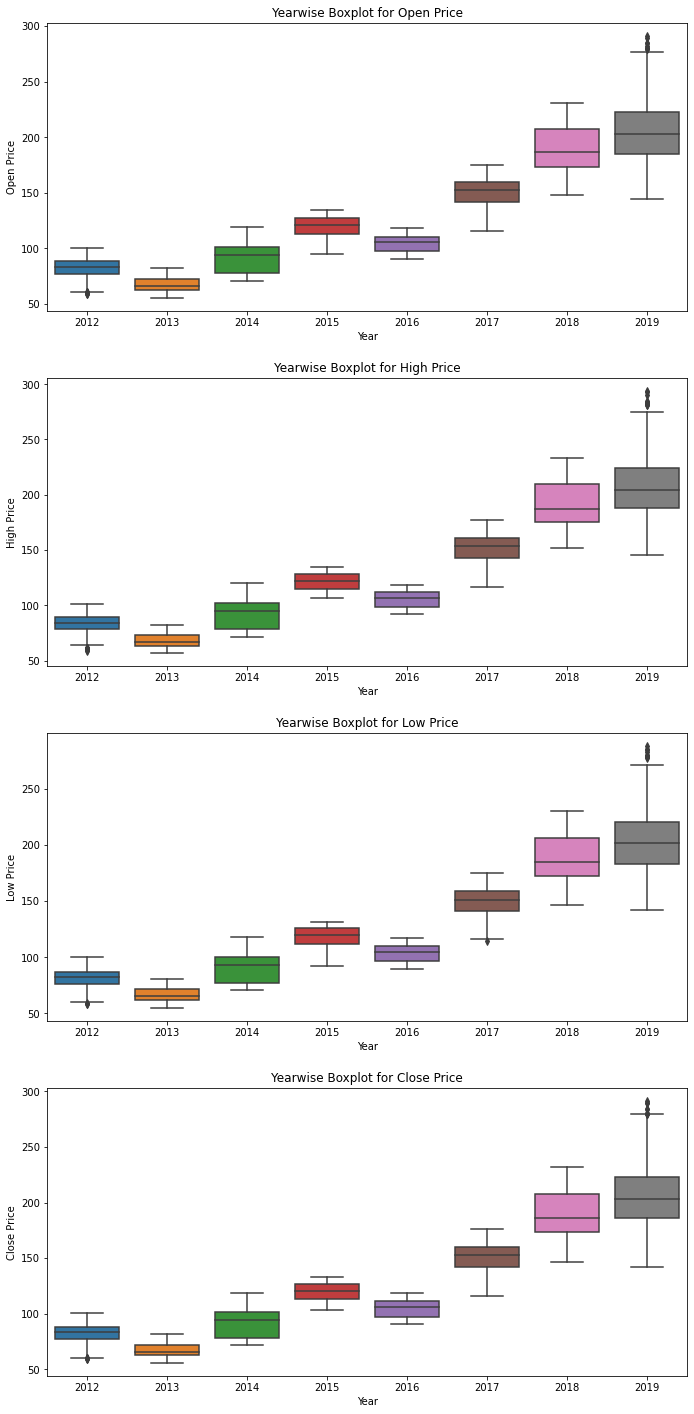

In [61]:
fig, (axs1,axs2,axs3,axs4) = plt.subplots(4,figsize=(10,20))

sns.boxplot(y=data['Open'],x=data.index.year,ax=axs1)
axs1.set_xlabel('Year')
axs1.set_ylabel('Open Price')
axs1.set_title('Yearwise Boxplot for Open Price')

sns.boxplot(y=data['High'],x=data.index.year,ax=axs2)
axs2.set_xlabel('Year')
axs2.set_ylabel('High Price')
axs2.set_title('Yearwise Boxplot for High Price')

sns.boxplot(y=data['Low'],x=data.index.year,ax=axs3)
axs3.set_xlabel('Year')
axs3.set_ylabel('Low Price')
axs3.set_title('Yearwise Boxplot for Low Price')

sns.boxplot(y=data['Close'],x=data.index.year,ax=axs4)
axs4.set_xlabel('Year')
axs4.set_ylabel('Close Price')
axs4.set_title('Yearwise Boxplot for Close Price')

fig.tight_layout(pad = 2.0)
plt.show()

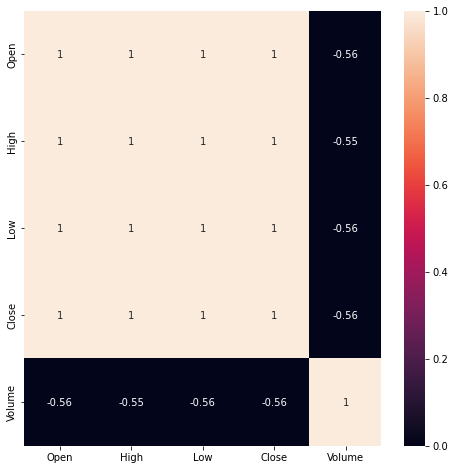

In [62]:
corr_matrix = data.corr()

plt.figure(figsize=(8,8))
sns.heatmap(data = corr_matrix,annot=True,vmin=0)
plt.show()

In [63]:
# Selecting close price as target variable
data_close = pd.DataFrame(data['Close'])
data_close.head()

,Close
Date,
2012-01-03,58.747143
2012-01-04,59.062859
2012-01-05,59.718571
2012-01-06,60.342857
2012-01-09,60.247143


In [64]:
# drop irrelevant columns
data.drop(['Volume','Low','High','Open'],inplace=True,axis=1)

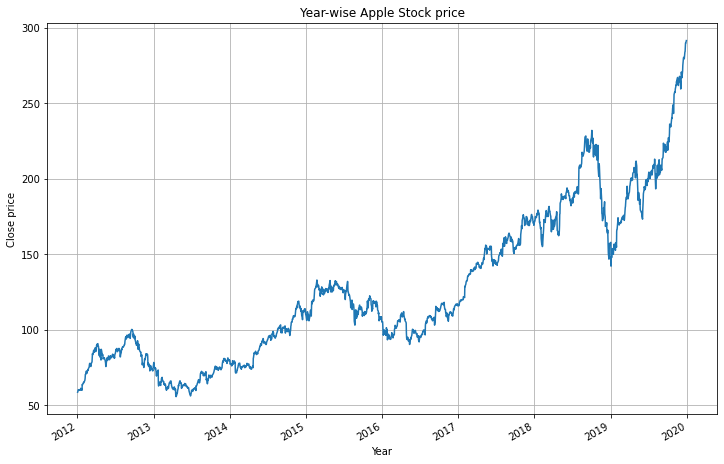

In [65]:
plt.figure(figsize=(12,8))
data_close['Close'].plot()
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Close price')
plt.title('Year-wise Apple Stock price')
plt.show()

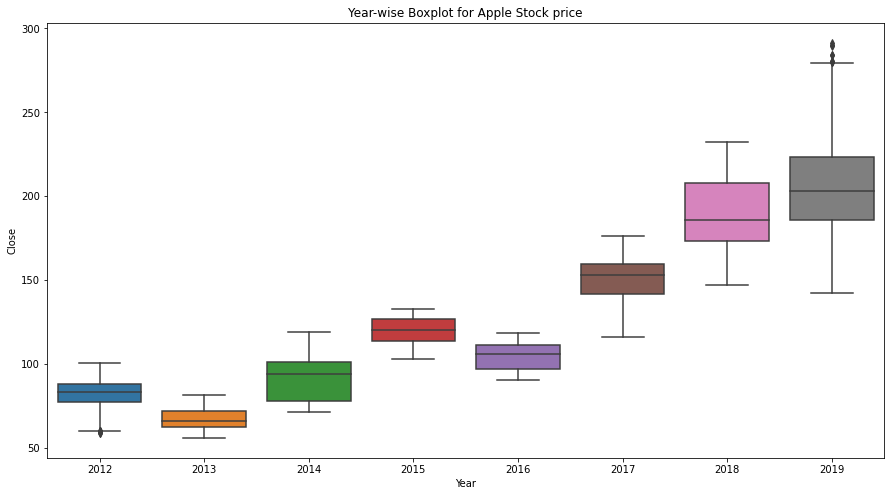

In [66]:
plt.figure(figsize=(15,8))
sns.boxplot(x= data_close.index.year, y= data_close['Close'])
plt.title('Year-wise Boxplot for Apple Stock price')
plt.xlabel('Year')
plt.ylabel('Close')
plt.show()

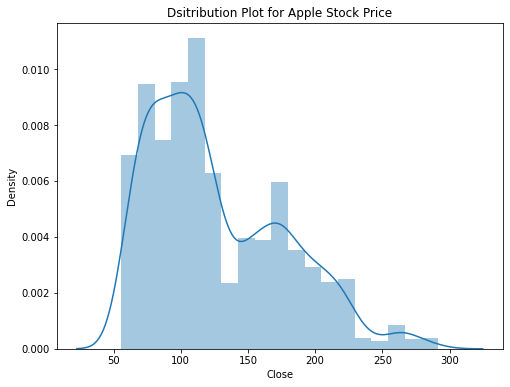

In [67]:
plt.figure(figsize=(8,6))
sns.distplot(data_close['Close'],)
plt.title('Dsitribution Plot for Apple Stock Price')
plt.show()

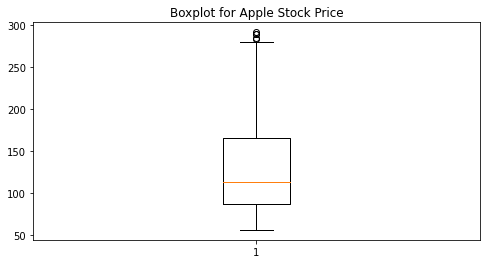

In [68]:
plt.figure(figsize=(8,4))
box = plt.boxplot(data_close['Close'])
plt.title('Boxplot for Apple Stock Price')
plt.show()

In [69]:
# Finding the outlier values
for elem in box['fliers']:
    print(elem)
    print(elem.get_ydata())


Line2D(_line6)
[284.       284.269989 289.910004 289.799988 291.519989]


In [70]:
print(data_close.loc[data_close['Close'] == 284.])
print(data_close.loc[data_close['Close'] == 284.269989] )
print(data_close.loc[data_close['Close'] == 289.910004])
print(data_close.loc[data_close['Close'] == 289.799988 ])
print(data_close.loc[data_close['Close'] == 291.519989 ])

            Close
Date             
2019-12-23  284.0
                 Close
Date                  
2019-12-24  284.269989
                 Close
Date                  
2019-12-26  289.910004
                 Close
Date                  
2019-12-27  289.799988
                 Close
Date                  
2019-12-30  291.519989


In [71]:
data_close['Day'] = data_close.index.strftime('%A')
data_close['Month'] = data_close.index.strftime('%B')
data_close['Year'] = data_close.index.year
data_close['Quarter'] = data_close.index.quarter
data_close['Week_Number'] = data_close.index.week
data_close

,Close,Day,Month,Year,Quarter,Week_Number
Date,,,,,,
2012-01-03,58.747143,Tuesday,January,2012,1,1
2012-01-04,59.062859,Wednesday,January,2012,1,1
2012-01-05,59.718571,Thursday,January,2012,1,1
2012-01-06,60.342857,Friday,January,2012,1,1
2012-01-09,60.247143,Monday,January,2012,1,2
...,...,...,...,...,...,...
2019-12-23,284.000000,Monday,December,2019,4,52
2019-12-24,284.269989,Tuesday,December,2019,4,52
2019-12-26,289.910004,Thursday,December,2019,4,52


In [72]:
data_close['Day'] = data_close.index.strftime('%A')
data_close['Month'] = data_close.index.strftime('%B')
data_close['Year'] = data_close.index.year
data_close['Quarter'] = data_close.index.quarter
data_close['Week_Number'] = data_close.index.week
data_close

,Close,Day,Month,Year,Quarter,Week_Number
Date,,,,,,
2012-01-03,58.747143,Tuesday,January,2012,1,1
2012-01-04,59.062859,Wednesday,January,2012,1,1
2012-01-05,59.718571,Thursday,January,2012,1,1
2012-01-06,60.342857,Friday,January,2012,1,1
2012-01-09,60.247143,Monday,January,2012,1,2
...,...,...,...,...,...,...
2019-12-23,284.000000,Monday,December,2019,4,52
2019-12-24,284.269989,Tuesday,December,2019,4,52
2019-12-26,289.910004,Thursday,December,2019,4,52


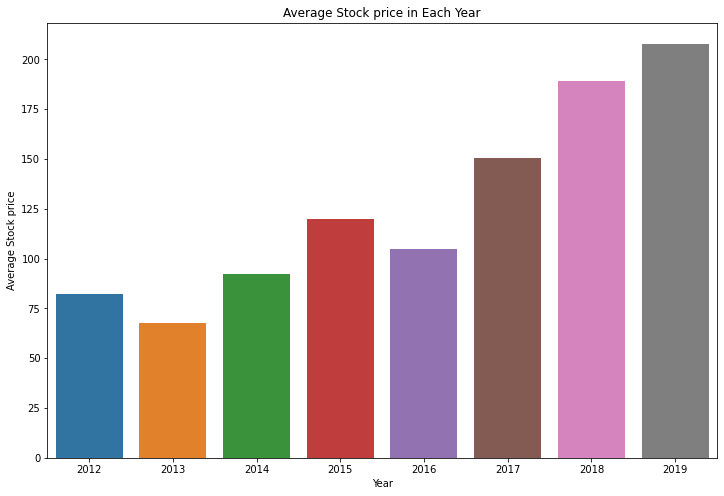

In [73]:
plt.figure(figsize=(12,8))
sns.barplot(x='Year', y='Close',data=data_close,palette='tab10',ci=0)
plt.title('Average Stock price in Each Year')
plt.xlabel('Year')
plt.ylabel('Average Stock price')
plt.show()

In [74]:
#Apple stock price is increasing each year.
# In 2013 and 2016 average stock price is lower than previous year

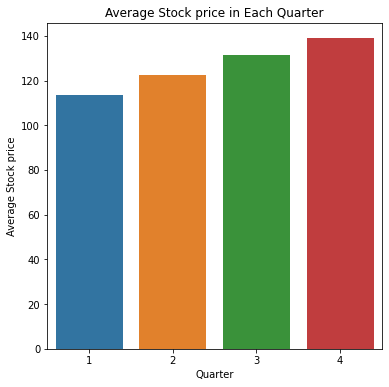

In [75]:
 data_quarter = pd.DataFrame(data_close.groupby('Quarter')['Close'].mean()).reset_index()

plt.figure(figsize=(6,6))
sns.barplot(x='Quarter', y='Close',data=data_quarter,palette='tab10',ci=0)
plt.title('Average Stock price in Each Quarter')
plt.ylabel('Average Stock price')
plt.show()

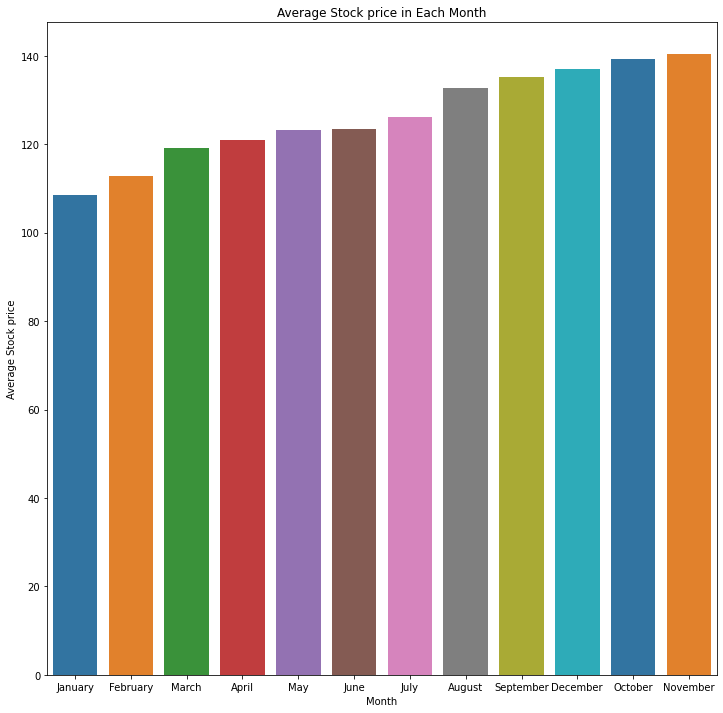

In [76]:
data_month = pd.DataFrame(data_close.groupby('Month')['Close'].mean()).reset_index().sort_values('Close')

plt.figure(figsize=(12,12))
sns.barplot(x='Month', y='Close',data=data_month,palette='tab10',ci=0)
plt.title('Average Stock price in Each Month')
plt.ylabel('Average Stock price')
plt.show()

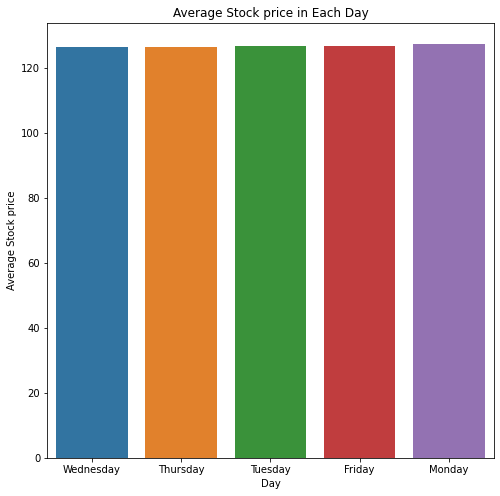

In [77]:
data_day = pd.DataFrame(data_close.groupby('Day')['Close'].mean()).reset_index().sort_values('Close')

plt.figure(figsize=(8,8))
sns.barplot(x='Day', y='Close',data=data_day,palette='tab10',ci=0)
plt.title('Average Stock price in Each Day')
plt.ylabel('Average Stock price')
plt.show()

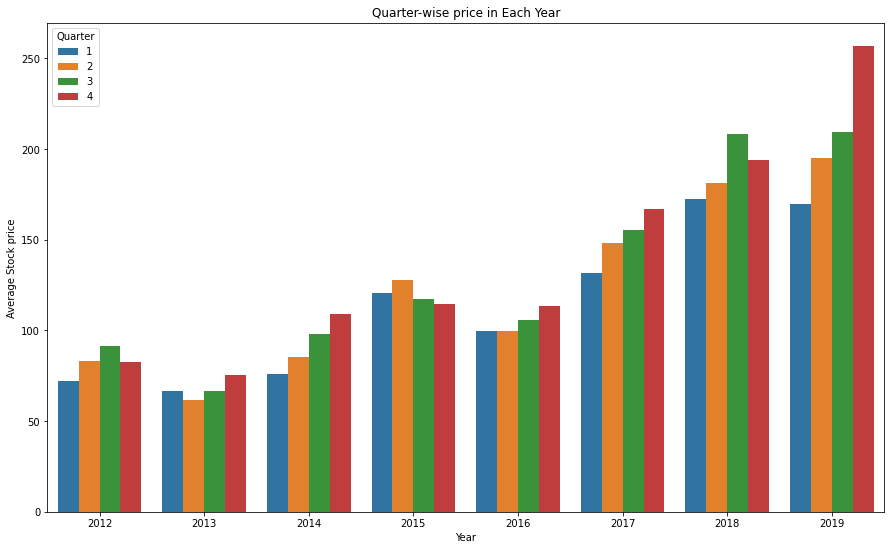

In [78]:
plt.figure(figsize=(15,9))
sns.barplot(x='Year', y='Close',data=data_close,hue='Quarter',palette='tab10',ci=0)
plt.title('Quarter-wise price in Each Year')
plt.xlabel('Year')
plt.ylabel('Average Stock price')
plt.show()

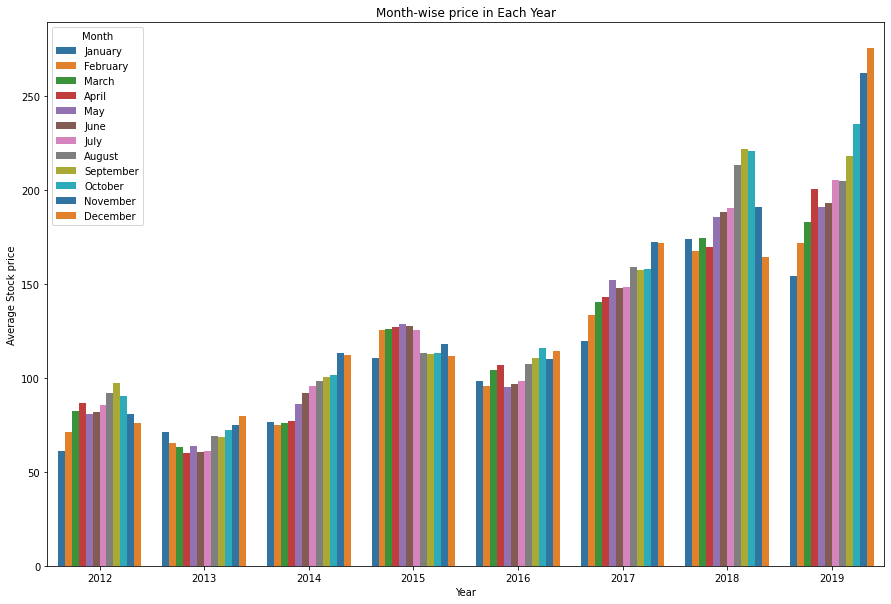

In [79]:
plt.figure(figsize=(15,10))
sns.barplot(x='Year', y='Close',data=data_close,hue='Month',palette='tab10',ci=0)
plt.title('Month-wise price in Each Year')
plt.xlabel('Year')
plt.ylabel('Average Stock price')
plt.show()

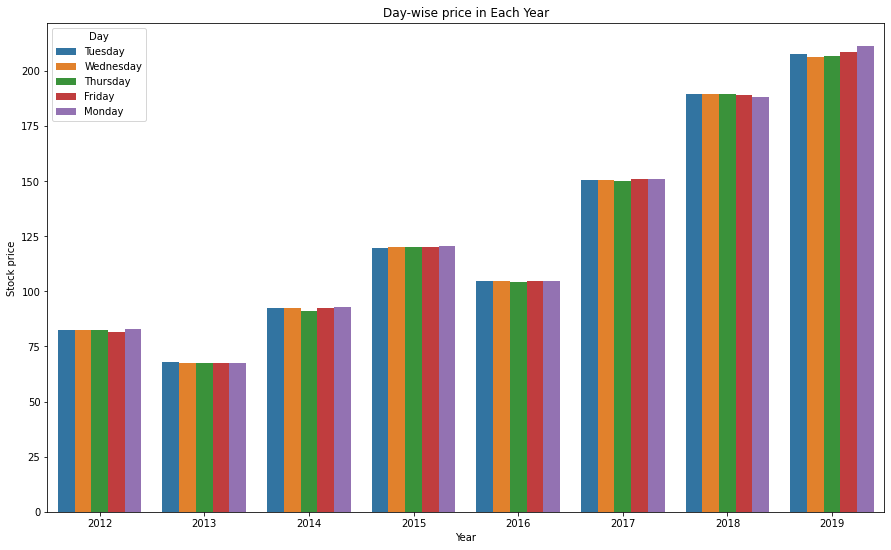

In [80]:
plt.figure(figsize=(15,9))
sns.barplot(x='Year', y='Close',data=data_close,hue='Day',palette='tab10',ci=0)
plt.title('Day-wise price in Each Year')
plt.xlabel('Year')
plt.ylabel('Stock price')
plt.show()

In [81]:
# Seasonal Decompose

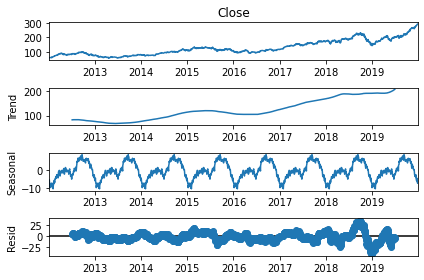

In [82]:
sd = seasonal_decompose(data_close['Close'],period=251)
sd.plot()
plt.show()

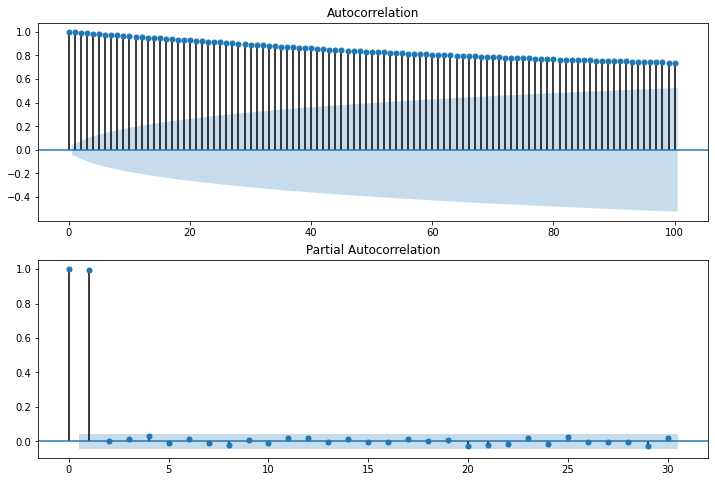

In [83]:

fig,(ax1,ax2) = plt.subplots(2,figsize=(12,8))
plot_acf(data_close['Close'],lags=100,ax=ax1)
plot_pacf(data_close['Close'],lags=30,ax=ax2)
plt.show()

In [84]:
data_close = pd.DataFrame(data.Close)

In [85]:
# Insight from EDA:
#1.Time series data has trand and seasonality.Trend is Upward and Seasonality is 251 days
#2.The year 2019 is the most volatile year. A huge drop in stock price happened in the same year
#3.Q4 is the best quarter for Apple according to average stock price

In [86]:
# Model Building
# Checking stationarity of time series using Augmented Dickey Fuller Test
  # H0 = Time series is not Stationary
  # H1 = TIme series is Stationary


In [98]:
print("P-Value ", adfuller(data_close.Close)[1])
print("we fail to reject H0 since the P-value is greater then significant value So Time series is non Stationary")

P-Value  0.9961170178032009
we fail to reject H0 since the P-value is greater then significant value So Time series is non Stationary


In [99]:
print("Differencing series to make it stationary")

Differencing series to make it stationary


In [90]:
# Differencing

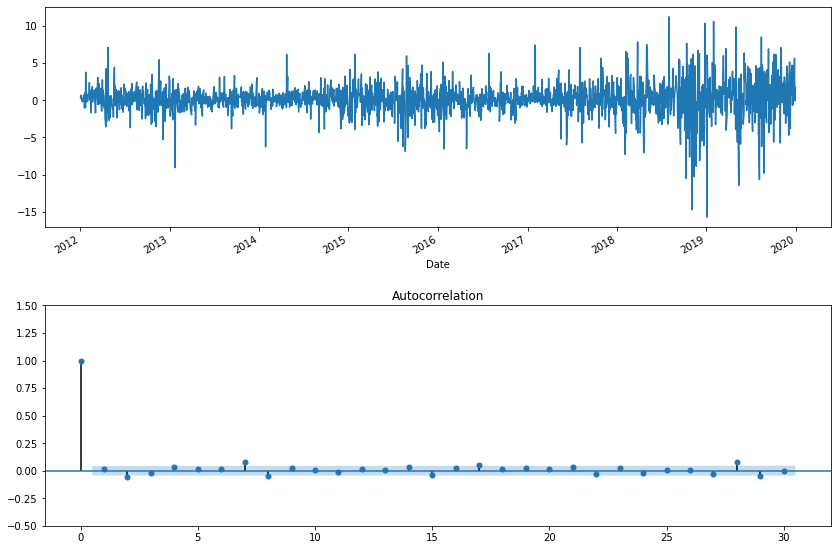

In [91]:
#First order differencing
fig,(ax1,ax2) = plt.subplots(2,figsize=(12,8))
data_close['Close'].diff().plot(ax=ax1)
plot_acf(data_close['Close'].diff().dropna(),lags=30,ax=ax2)
ax2.set_ylim(-0.5,1.5)
plt.tight_layout(pad=2)
plt.show()

In [108]:
print("P-value", adfuller(data_close.Close.diff().dropna())[1])
print("p-value is less than significant value. Therefore series is stationary now.")
print("order of defferencing is 1")

P-value 1.7631231987208899e-25
p-value is less than significant value. Therefore series is stationary now.
order of defferencing is 1


In [111]:
# order of ARIMA
# Order of AR term (p)

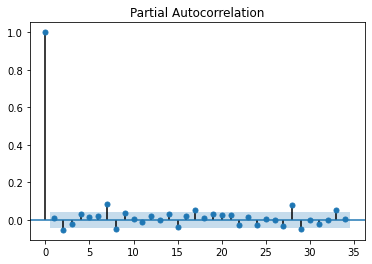

In [110]:
plot_pacf(data_close['Close'].diff().dropna())

plt.show()

In [112]:
# Order of MA term (q)¶

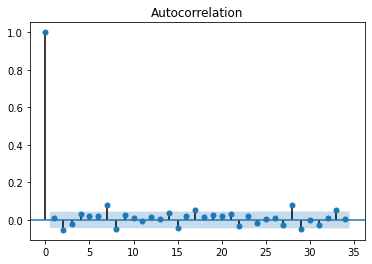

In [113]:
plot_acf(data_close['Close'].diff().dropna())
plt.show()

In [114]:
# Converting the data in to data_train and data_test
data_train = data_close.loc[:'2017-12-29']
# Stock price from last 2 years are selected as data_test
data_test = data_close.loc['2018-01-02':]

In [115]:
model_arima = ARIMA(data_train['Close'],order=(0,1,0))
result = model_arima.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1509
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -2795.585
Date:                Sun, 08 Jan 2023   AIC                           5593.170
Time:                        05:33:39   BIC                           5598.488
Sample:                             0   HQIC                          5595.150
                               - 1509                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         2.3864      0.052     46.131      0.000       2.285       2.488
===================================================================================
Ljung-Box (L1) (Q):                   0.85   Jarque-Bera (JB):               859.19
Prob(Q):                              0.36   Prob(JB):                         0.00
Heteroskedasticity (H):               1.35   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [116]:
test_pred = pd.DataFrame(result.predict(len(data_train),len(data_train)+501,typ='levels'))
test_pred.index = data_test.index
test_pred.columns=data_test.columns
test_pred

,Close
Date,
2018-01-02,169.229996
2018-01-03,169.229996
2018-01-04,169.229996
2018-01-05,169.229996
2018-01-08,169.229996
...,...
2019-12-23,169.229996
2019-12-24,169.229996
2019-12-26,169.229996


In [117]:
mse = mean_squared_error(test_pred.Close,data_test.Close)
rmse = np.round(np.sqrt(mse),2)
mape = np.round(mean_absolute_percentage_error(test_pred.Close,data_test.Close),3)

In [118]:
print('\n RMSE = ',rmse)
print('\n MAPE = ', mape)


 RMSE =  41.69

 MAPE =  0.186


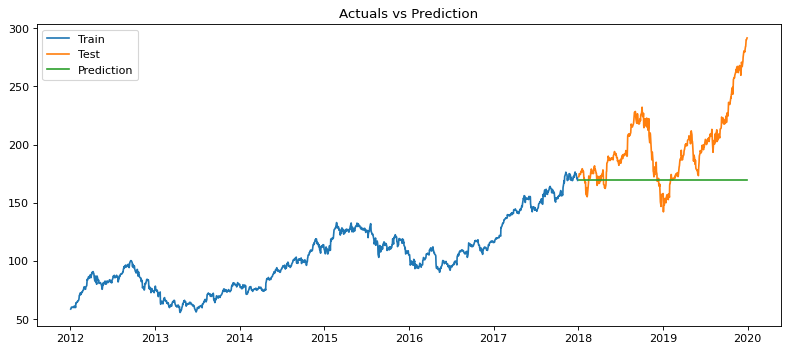

**************************************************
from above graph clearly shows that ARIMA Model is not working Properly


In [125]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(data_train, label = 'Train')
plt.plot(data_test, label='Test')
plt.plot(test_pred, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

print("*"*50)
print("from above graph clearly shows that ARIMA Model is not working Properly")

In [126]:
arima = ARIMA(data_close['Close'],order=(0,1,0))
arima_fit = arima.fit()
arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2011
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -4371.956
Date:                Sun, 08 Jan 2023   AIC                           8745.913
Time:                        05:38:26   BIC                           8751.519
Sample:                             0   HQIC                          8747.971
                               - 2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         4.5373      0.070     65.042      0.000       4.401       4.674
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):              3663.83
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               5.23   Skew:                            -0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [127]:
forecast = arima_fit.predict(len(data_close),len(data_close)+29,typ='levels')
forecast_df = pd.DataFrame(forecast)
forecast_df.columns=['Close']

In [128]:
# Getting date range for forecasting
date = pd.date_range('2020-01-01',periods=30, freq='B')
date_df = pd.DataFrame(date,columns=['Date'])

In [129]:
data_forecast = forecast_df.set_index(date_df.Date)
data_forecast.head()

,Close
Date,
2020-01-01,291.519989
2020-01-02,291.519989
2020-01-03,291.519989
2020-01-06,291.519989
2020-01-07,291.519989


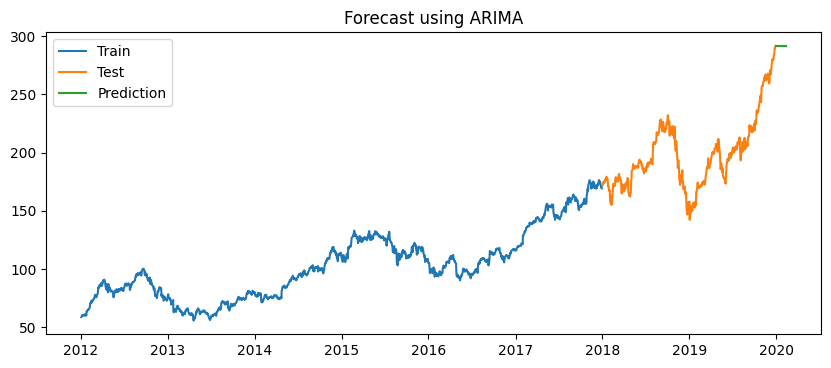

In [130]:
plt.figure(figsize=(10,4), dpi=100)
plt.plot(data_train, label = 'Train')
plt.plot(data_test, label='Test')
plt.plot(data_forecast, label='Prediction')
plt.title('Forecast using ARIMA')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [131]:
# SARIMA Model 

In [132]:
# Training the SARIMA model with data_train
model_sarima = sm.tsa.SARIMAX(data_train.Close,order=(2,1,0),seasonal_order=(1,1,0,63),enforce_invertibility=False,enforce_stationarity=False)
sarima_fit = model_sarima.fit()
sarima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                 1509
Model:             SARIMAX(2, 1, 0)x(1, 1, 0, 63)   Log Likelihood               -2814.964
Date:                            Sun, 08 Jan 2023   AIC                           5637.928
Time:                                    05:44:39   BIC                           5658.847
Sample:                                         0   HQIC                          5645.754
                                           - 1509                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0140      0.023      0.595      0.552      -0.032       0.060
ar.L2         -0.0516      0.028     -1.872      0.061      -0.106       0.002
ar.S.L63      -0.5344      0.019    -28.075      0.000      -0.572      -0.497
sigma2         3.4618      0.079     43.641      0.000       3.306       3.617
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               719.21
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                            -0.00
Prob(H) (two-sided):                  0.07   Kurtosis:                         6.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [133]:
# Predicting for data_test
prediction = sarima_fit.predict(len(data_train),len(data_train)+501)

test_prediction= pd.DataFrame(prediction)
test_prediction.columns = ['Close']
test_prediction.index = data_test.index
test_prediction

,Close
Date,
2018-01-02,168.667110
2018-01-03,169.417301
2018-01-04,168.233889
2018-01-05,169.891853
2018-01-08,170.319673
...,...
2019-12-23,278.560898
2019-12-24,278.473613
2019-12-26,278.010026


In [134]:
rmse = np.round(np.sqrt(mean_squared_error(data_test.Close,test_prediction.Close)),2)
mape = np.round(mean_absolute_percentage_error(test_prediction.Close,data_test.Close),3)

print('\n RMSE = ',rmse)
print('\n MAPE = ', mape)


 RMSE =  39.34

 MAPE =  0.133


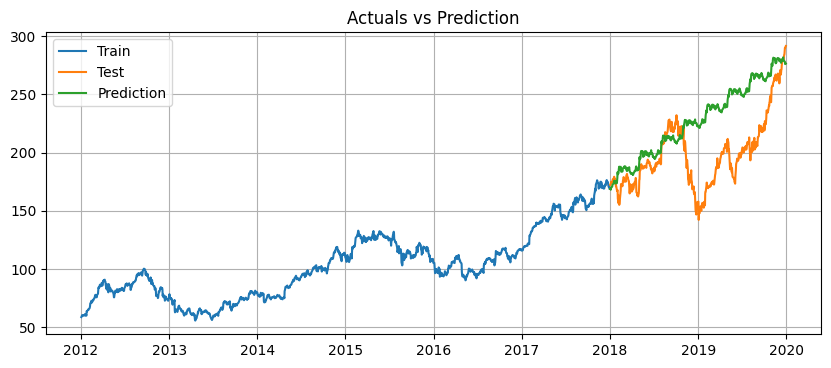

In [135]:
plt.figure(figsize=(10,4), dpi=100)
plt.plot(data_train, label = 'Train')
plt.plot(data_test, label='Test')
plt.plot(test_prediction, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)
plt.show()

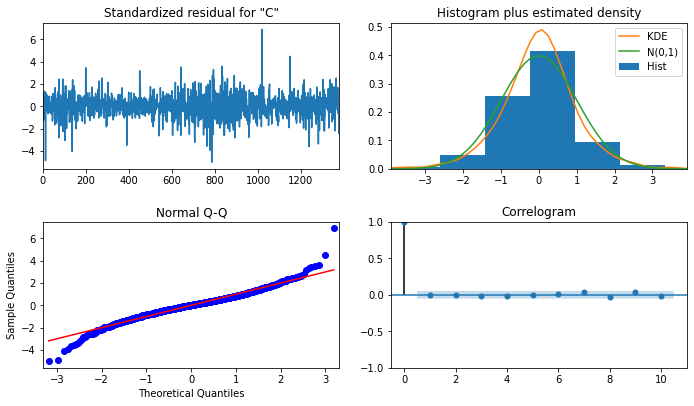

In [136]:
sarima_fit.plot_diagnostics(figsize=(10,6))
plt.tight_layout(pad=2)

In [137]:
#The residuals are normally distributed with mean 0 and constant variance

In [138]:
# Training the SARIMA model with data_train
model_sarima = sm.tsa.SARIMAX(data_train.Close,order=(2,1,0),seasonal_order=(1,1,0,63),enforce_invertibility=False,enforce_stationarity=False)
sarima_fit = model_sarima.fit()
sarima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                 1509
Model:             SARIMAX(2, 1, 0)x(1, 1, 0, 63)   Log Likelihood               -2814.964
Date:                            Sun, 08 Jan 2023   AIC                           5637.928
Time:                                    06:07:43   BIC                           5658.847
Sample:                                         0   HQIC                          5645.754
                                           - 1509                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0140      0.023      0.595      0.552      -0.032       0.060
ar.L2         -0.0516      0.028     -1.872      0.061      -0.106       0.002
ar.S.L63      -0.5344      0.019    -28.075      0.000      -0.572      -0.497
sigma2         3.4618      0.079     43.641      0.000       3.306       3.617
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               719.21
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                            -0.00
Prob(H) (two-sided):                  0.07   Kurtosis:                         6.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [139]:
# Predicting for data_test
prediction = sarima_fit.predict(len(data_train),len(data_train)+501)

test_prediction= pd.DataFrame(prediction)
test_prediction.columns = ['Close']
test_prediction.index = data_test.index
test_prediction

,Close
Date,
2018-01-02,168.667110
2018-01-03,169.417301
2018-01-04,168.233889
2018-01-05,169.891853
2018-01-08,170.319673
...,...
2019-12-23,278.560898
2019-12-24,278.473613
2019-12-26,278.010026


In [141]:
# Accuracy Matrics

In [140]:
rmse = np.round(np.sqrt(mean_squared_error(data_test.Close,test_prediction.Close)),2)
mape = np.round(mean_absolute_percentage_error(test_prediction.Close,data_test.Close),3)

print('\n RMSE = ',rmse)
print('\n MAPE = ', mape)


 RMSE =  39.34

 MAPE =  0.133


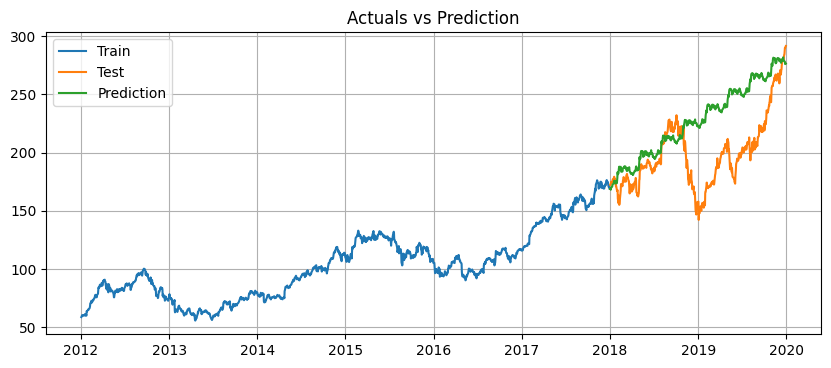

In [142]:
plt.figure(figsize=(10,4), dpi=100)
plt.plot(data_train, label = 'Train')
plt.plot(data_test, label='Test')
plt.plot(test_prediction, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)
plt.show()

In [143]:
#SARIMA model is capturing trend and seasonlity better than ARIMA and is performing well.

In [144]:
#Residual Plot

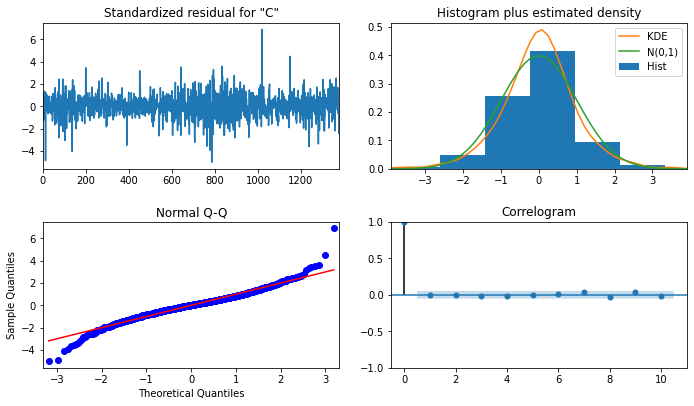

In [145]:
sarima_fit.plot_diagnostics(figsize=(10,6))
plt.tight_layout(pad=2)

In [147]:
#The residuals are normally distributed with mean 0 and constant variance

In [148]:
#Rebuild the model for Forecasting

In [149]:
# Rebuilding the model for whole data
model_sarima_final = sm.tsa.SARIMAX(data_close.Close,order=(2,1,0),seasonal_order=(1,1,0,63))
sarima_fit_final = model_sarima_final.fit()

In [150]:
# Forecasting for next 30 days
forecast = sarima_fit_final.predict(len(data_close),len(data_close)+29)
forecast_df = pd.DataFrame(forecast)
forecast_df.columns = ['Close']

In [151]:
data_forecast = forecast_df.set_index(date_df.Date)
data_forecast

,Close
Date,
2020-01-01,292.331817
2020-01-02,290.573766
2020-01-03,291.412307
2020-01-06,292.350411
2020-01-07,292.989321
2020-01-08,292.672426
2020-01-09,293.232303
2020-01-10,295.531666
2020-01-13,299.531149


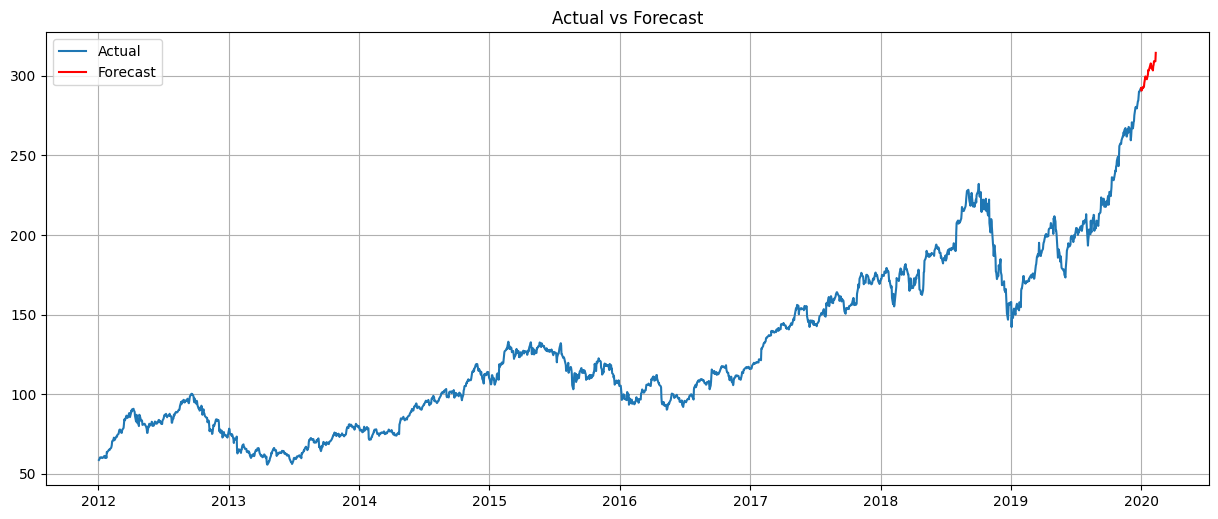

In [152]:
plt.figure(figsize=(15,6), dpi=100)
plt.plot(data_close, label = 'Actual')
plt.plot(data_forecast, label='Forecast',color='red')
plt.title('Actual vs Forecast')
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)
plt.show()

In [153]:
# Holt-Winters Method

In [154]:
# Since data is non-stationary we are using triple exponential smoothing.
Mul_Add = ExponentialSmoothing(data_train['Close'],trend='mul',seasonal='add',seasonal_periods=251)
result_TES = Mul_Add.fit()

In [155]:
test_pred_tes = pd.DataFrame(result_TES.forecast(502))
test_pred_tes.columns = ['Close']
test_pred_tes.index = data_test.index
test_pred_tes

,Close
Date,
2018-01-02,168.891398
2018-01-03,168.634168
2018-01-04,168.711814
2018-01-05,168.816973
2018-01-08,168.381451
...,...
2019-12-23,238.378223
2019-12-24,238.386137
2019-12-26,237.368773


In [156]:
# Accuracy of Matrix

In [157]:
rmse_tes = np.round(np.sqrt(mean_squared_error(test_pred_tes.Close,data_test.Close)),2)
mape_tes = np.round(mean_absolute_percentage_error(data_test.Close,test_pred_tes.Close),2)
print('\n RMSE = ',rmse_tes)
print('\n MAPE = ',mape_tes)


 RMSE =  23.52

 MAPE =  0.1


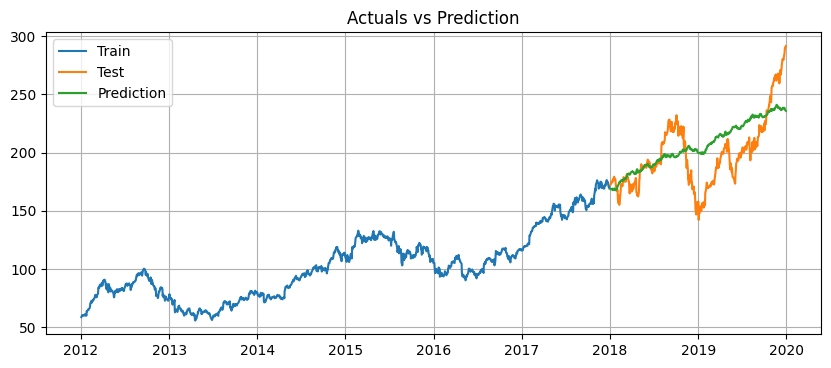

In [158]:
plt.figure(figsize=(10,4), dpi=100)
plt.plot(data_train, label = 'Train')
plt.plot(data_test, label='Test')
plt.plot(test_pred_tes, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)
plt.show()

In [159]:
# Forecast Using Holt-Winters

In [160]:
# Retrain the model is whole data
tes = ExponentialSmoothing(data_close['Close'],trend='mul',seasonal='add',seasonal_periods=251)
result_1 = tes.fit()

In [161]:
forecast_df_tes = pd.DataFrame(result_1.predict(len(data_close),len(data_close)+29))
forecast_df_tes.columns = ['CLose']
forecast_df_tes.index = date_df.Date
forecast_df_tes.head()

,CLose
Date,
2020-01-01,292.212282
2020-01-02,290.624294
2020-01-03,292.128279
2020-01-06,293.055522
2020-01-07,293.620462


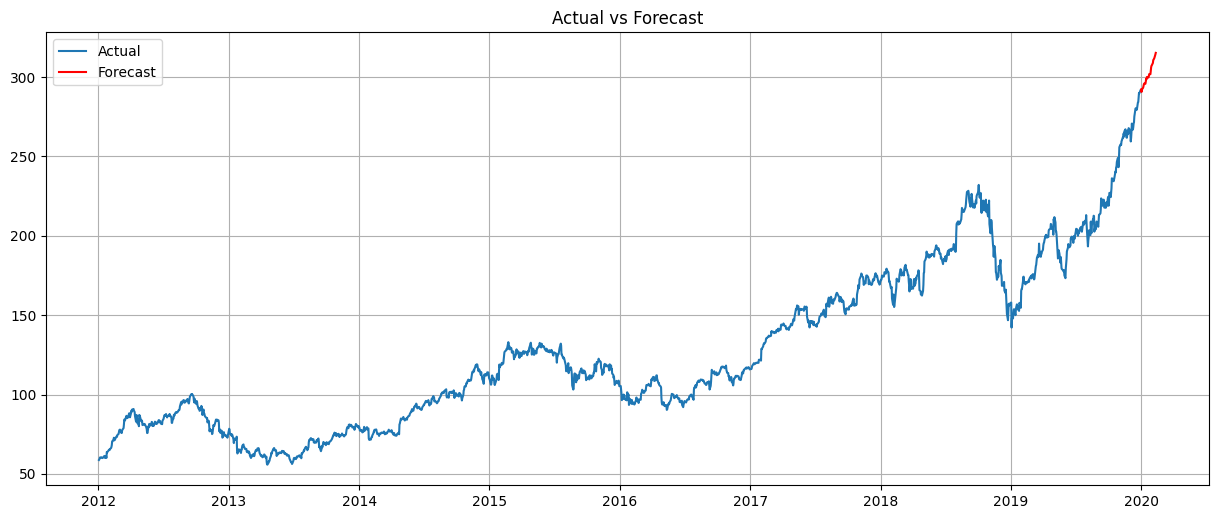

In [162]:
plt.figure(figsize=(15,6), dpi=100)
plt.plot(data_close, label = 'Actual')
plt.plot(forecast_df_tes, label='Forecast',color='red')
plt.title('Actual vs Forecast')
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)
plt.show()

In [163]:
# Deployment

In [164]:
#dump(sarima_fit_final,open('sarima_fit_final.sav','wb'))
dump(data_close,open('data_close.sav','wb'))

## Project Summary



*   I build model using ARIMA, SARIMA and Holt-Winters method.
*   I'm not using ARIMA here, since it's not capturing seasonal part.
*   Accuracy metrics of Holt-Winters method is the better compared to others, but still SARIMA captures seasonal part better.
*   SARIMA is better at prediction and it has more parameters,since Holt-winters has only 3
*   I deployed the model using SARIMA(2,1,0)x(1,1,0,63).




